In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_violences_conjugales_province_sud.csv")
df['Date du contact'] = pd.to_datetime(df['Date du contact'], format='%Y-%m')

print(f"shape: {df.shape}")
print(f"columns: {df.columns}")
df.head()

shape: (5636, 15)
columns: Index(['Sexe', 'Année de naissance', 'Commune', 'Situation familiale',
       'Habitat', 'Catégorie socioprofessionnelle', 'Nationalité',
       'Nombre d'enfant(s)', 'Date du contact', '1er contact', 'Motif',
       'Violences', 'Produits addictifs', 'Envoyé(e) par institution',
       'age_contact'],
      dtype='object')


,Sexe,Année de naissance,Commune,Situation familiale,Habitat,Catégorie socioprofessionnelle,Nationalité,Nombre d'enfant(s),Date du contact,1er contact,Motif,Violences,Produits addictifs,Envoyé(e) par institution,age_contact
0,M,NaN,Nouméa,Union libre,NaN,NaN,FRANCAISE,1.0,2022-04-01,True,Auteur,Physiques,NaN,Service pénitentiaire d'insertion et de probat...,0.0
1,F,NaN,Nouméa,Célibataire,Hébergé,Employé-e,NaN,4.0,2021-07-01,True,Mixte,"Verbales,Psychologiques,Physiques",NaN,Associations,0.0
2,F,NaN,Nouméa,Séparé(e),Hébergé,Sans Emploi,NaN,1.0,2020-10-01,True,Mixte,Physiques,NaN,Entourage,0.0
3,M,NaN,Bourail,Union libre,Hébergé,NaN,NaN,2.0,2020-01-01,True,Auteur,"Verbales,Psychologiques,Physiques",NaN,Entourage,0.0
4,M,NaN,Paita,Séparé(e),NaN,NaN,NaN,5.0,2023-10-01,True,Auteur,"Psychologiques,Physiques",NaN,Service pénitentiaire d'insertion et de probat...,4.0


In [9]:
def is_verbale(s):
   if 'verbale' in s.lower():
      return True
   else:
      return False

def is_psycho(s):
   if 'psycho' in s.lower():
      return True
   else:
      return False

def is_physiq(s):
   if 'physiq' in s.lower():
      return True
   else:
      return False

def is_menace_mort(s):
   if 'menaces de mort' in s.lower():
      return True
   else:
      False

df.Violences.value_counts()

Violences
Verbales,Psychologiques,Physiques                                                1542
Physiques                                                                         650
Verbales,Physiques                                                                616
Verbales,Psychologiques                                                           306
Psychologiques,Physiques                                                          271
                                                                                 ... 
Abandon de famille,Psychologiques                                                   1
Verbales,Psychologiques,Physiques,Économiques,Intrafamiliales,Menaces de mort       1
Verbales,Dégradations de biens,Menaces de mort                                      1
Verbales,Menaces de mort,Physiques                                                  1
Cyber harcèlement                                                                   1
Name: count, Length: 254, dtype: int64

In [16]:
pd.crosstab(df.Sexe, df.Motif)#/[10,20]

Motif,Auteur,Autre,Enfant,Mixte,Victime
Sexe,,,,,
F,114,22,24,2343,968
M,1589,130,13,225,48


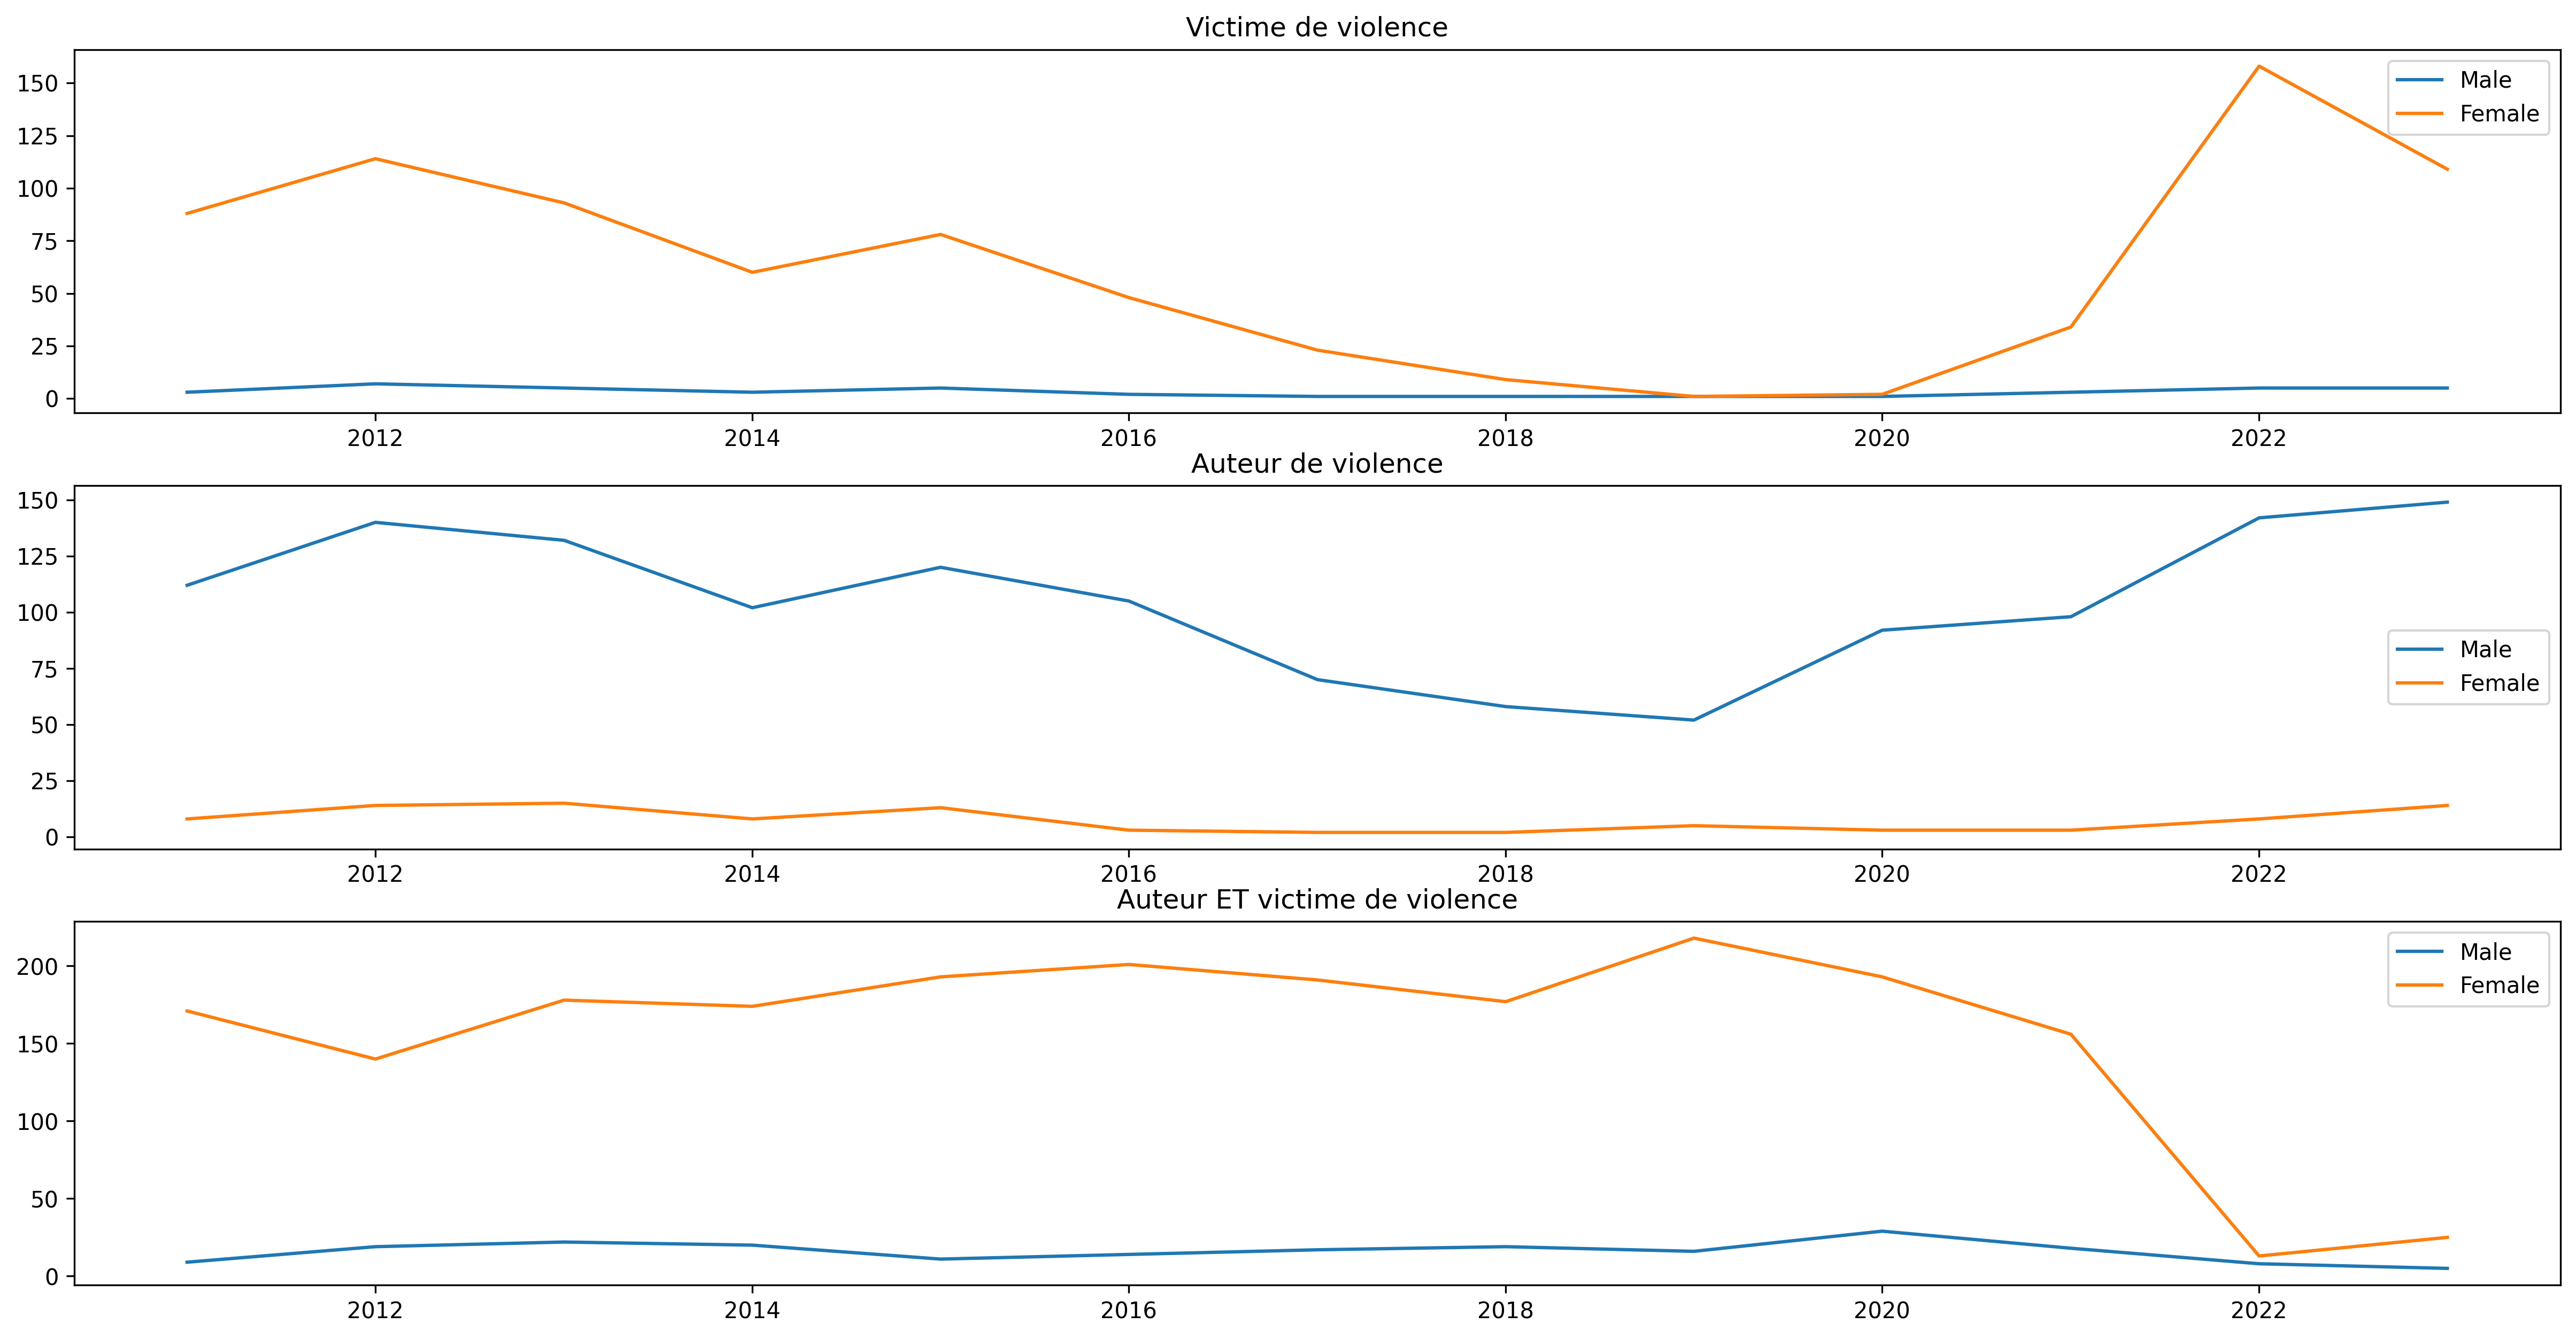

In [32]:
df['year'] = df['Date du contact'].dt.to_period('Y')
df = df.loc[df['year'] > "2010-01-01"]
df = df.loc[df['year'] < "2024-01-01"]

victim_M = df[
   (df['Sexe'] == 'M') & (df['Motif']== 'Victime')
].groupby('year').size().reset_index(name='event_count')
victim_F = df[
   (df['Sexe'] == 'F') & (df['Motif']== 'Victime')
].groupby('year').size().reset_index(name='event_count')
victim_M['date'] = victim_M['year'].dt.to_timestamp()
victim_F['date'] = victim_F['year'].dt.to_timestamp()

auteur_M = df[
   (df['Sexe'] == 'M') & (df['Motif']== 'Auteur')
].groupby('year').size().reset_index(name='event_count')
auteur_F = df[
   (df['Sexe'] == 'F') & (df['Motif']== 'Auteur')
].groupby('year').size().reset_index(name='event_count')
auteur_M['date'] = auteur_M['year'].dt.to_timestamp()
auteur_F['date'] = auteur_F['year'].dt.to_timestamp()

mixte_M = df[
   (df['Sexe'] == 'M') & (df['Motif']== 'Mixte')
].groupby('year').size().reset_index(name='event_count')
mixte_F = df[
   (df['Sexe'] == 'F') & (df['Motif']== 'Mixte')
].groupby('year').size().reset_index(name='event_count')
mixte_M['date'] = mixte_M['year'].dt.to_timestamp()
mixte_F['date'] = mixte_F['year'].dt.to_timestamp()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 10), dpi=300)

ax1.plot(victim_M['date'], victim_M['event_count'], label='Male')
ax1.plot(victim_F['date'], victim_F['event_count'], label='Female')
ax1.set_title("Victime de violence")
ax1.legend()

ax2.plot(auteur_M['date'], auteur_M['event_count'], label='Male')
ax2.plot(auteur_F['date'], auteur_F['event_count'], label='Female')
ax2.set_title("Auteur de violence")
ax2.legend()

ax3.plot(mixte_M['date'], mixte_M['event_count'], label='Male')
ax3.plot(mixte_F['date'], mixte_F['event_count'], label='Female')
ax3.set_title("Auteur ET victime de violence")
ax3.legend()

plt.show()


In [18]:
data_m_yearly

,year,event_count,date
0,1989,1,1989-01-01
1,2001,2,2001-01-01
2,2007,1,2007-01-01
3,2008,5,2008-01-01
4,2009,59,2009-01-01
5,2010,235,2010-01-01
6,2011,157,2011-01-01
7,2012,188,2012-01-01
8,2013,163,2013-01-01
9,2014,128,2014-01-01
